In [38]:
import random
import math
import time

# Data management
import numpy as np
import pandas as pd

# Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# Oversampling Technique
from imblearn.over_sampling import SMOTE

from collections import Counter

# Data Splitting
from sklearn.model_selection import train_test_split as tts

# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV as GSCV

# Model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import classification_report as cr

In [39]:
df = pd.read_csv('car.csv')
df


,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [40]:
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'evaluation']
df.columns = columns

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   buying      1728 non-null   object
 1   maint       1728 non-null   object
 2   doors       1728 non-null   object
 3   persons     1728 non-null   object
 4   lug_boot    1728 non-null   object
 5   safety      1728 non-null   object
 6   evaluation  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [42]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [43]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,evaluation
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


[Text(0.5, 1.0, 'Existent data (purple) and missing data (yellow) ratio')]

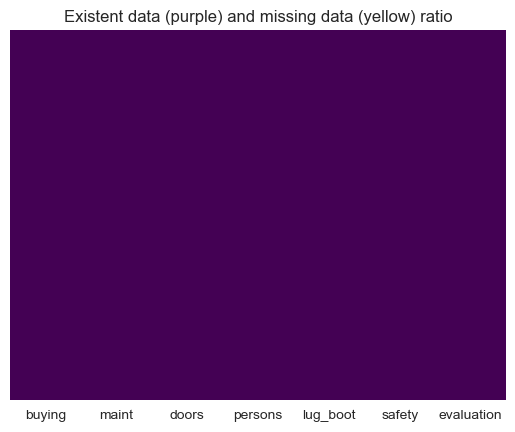

In [44]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title = 'Existent data (purple) and missing data (yellow) ratio')

In [45]:
df.isnull().sum()

buying        0
maint         0
doors         0
persons       0
lug_boot      0
safety        0
evaluation    0
dtype: int64

In [46]:
import warnings
warnings.filterwarnings("ignore")
mapping = {
    
    'm_buying_and_maint' : {
        # For 'buying' & 'maint' columns.
        'low': 1,
        'med': 2,
        'high': 3,
        'vhigh': 4,
    },
    
    'm_doors' : {
        # For 'doors' columns.
        '2': 1,
        '3': 2,
        '4': 3,
        '5more': 4,
    },
    
    'm_persons' : {
        # For 'persons' columns.
        '2': 1,
        '4': 2,
        'more': 3,
    },
    
    'm_lug_boot' : {
        # For 'lug_boot' column.
        'small': 1,
        'med': 2,
        'big': 3,
    },
    
    'm_safety' : {
        # For 'safety' column.
        'low': 1,
        'med': 2,
        'high': 3,
    },
    
    'm_evaluation' : {
        # For 'evaluation' column.
        'unacc': 1,
        'acc': 2,
        'good': 3,
        'vgood': 4
    }
}

df_encoded = df

df_encoded['buying'] = df['buying'].replace(mapping['m_buying_and_maint'])
df_encoded['maint'] = df['maint'].replace(mapping['m_buying_and_maint'])
df_encoded['doors'] = df['doors'].replace(mapping['m_doors'])
df_encoded['persons'] = df['persons'].replace(mapping['m_persons'])
df_encoded['lug_boot'] = df['lug_boot'].replace(mapping['m_lug_boot'])
df_encoded['safety'] = df['safety'].replace(mapping['m_safety'])
df_encoded['evaluation'] = df['evaluation'].replace(mapping['m_evaluation'])

df_encoded.head()

,buying,maint,doors,persons,lug_boot,safety,evaluation
0,4,4,1,1,1,1,1
1,4,4,1,1,1,2,1
2,4,4,1,1,1,3,1
3,4,4,1,1,2,1,1
4,4,4,1,1,2,2,1


[Text(0.5, 1.0, 'Number of cars per evaluation')]

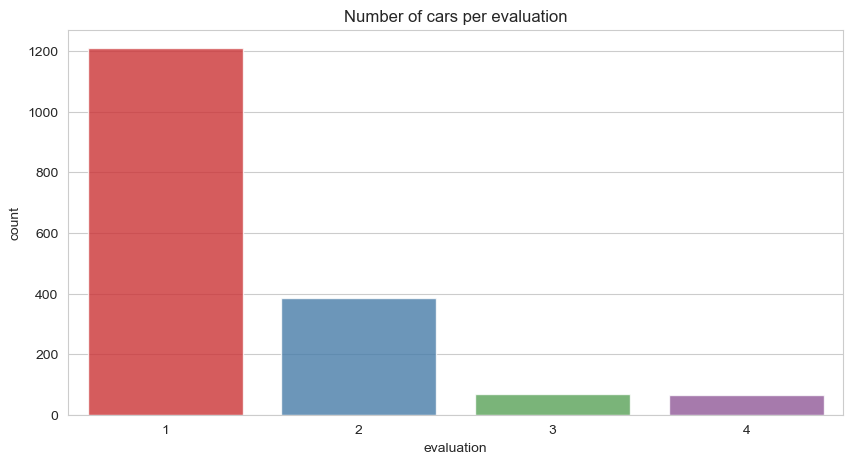

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_encoded, x='evaluation', palette='Set1', alpha=0.8).set(title = 'Number of cars per evaluation')

In [48]:
print(Counter(df_encoded['evaluation']))


Counter({1: 1210, 2: 384, 3: 69, 4: 65})


In [49]:
# The best and the worst evaluated cars.
highest = df_encoded[df_encoded['evaluation'] == 4]
lowest = df_encoded[df_encoded['evaluation'] == 1]

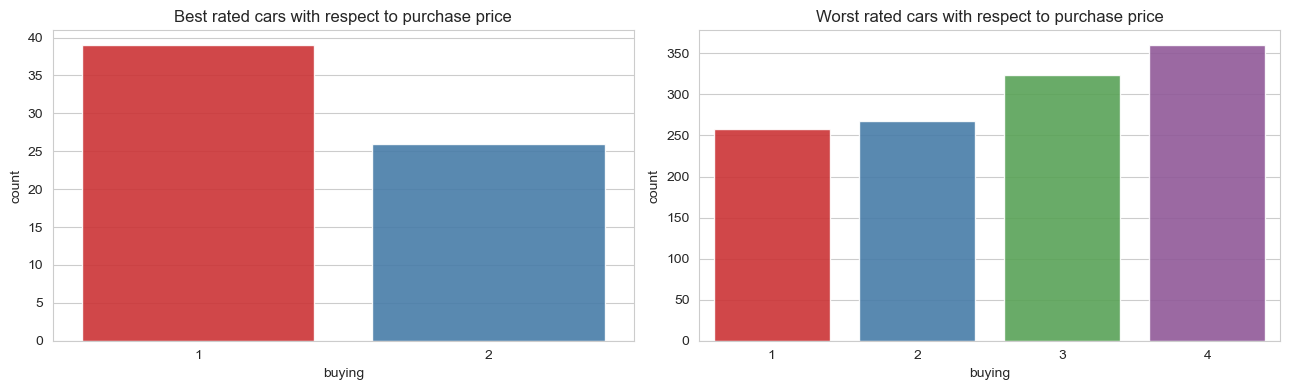

In [50]:
# What are the worst and best cars according to purchase price?
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4))

axes[0].set_title('Best rated cars with respect to purchase price')
sns.countplot(ax=axes[0], data=highest, x='buying', palette='Set1', alpha=0.9)

axes[1].set_title('Worst rated cars with respect to purchase price')
sns.countplot(ax=axes[1], data=lowest, x='buying', palette='Set1', alpha=0.9)

plt.tight_layout()

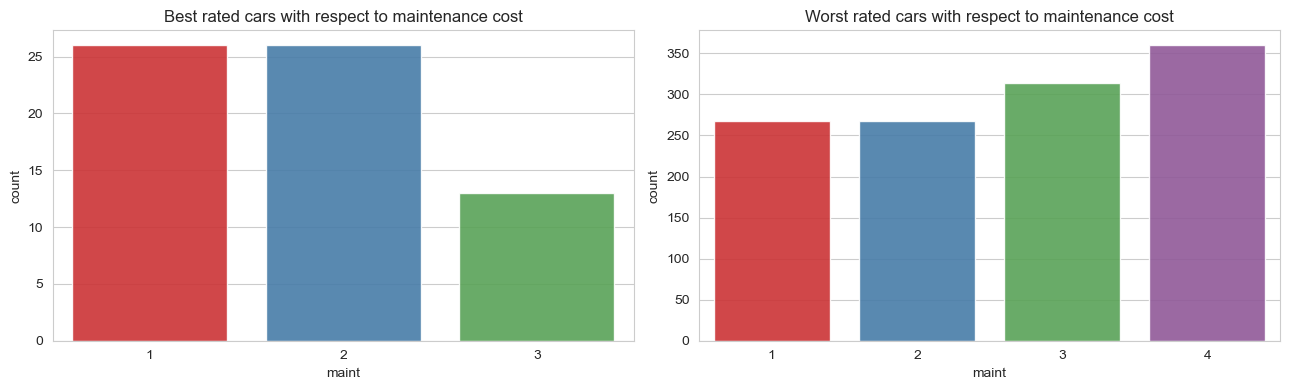

In [51]:
# What are the worst and best cars according to maintenance cost?
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4))

axes[0].set_title('Best rated cars with respect to maintenance cost')
sns.countplot(ax=axes[0], data=highest, x='maint', palette='Set1', alpha=0.9)

axes[1].set_title('Worst rated cars with respect to maintenance cost')
sns.countplot(ax=axes[1], data=lowest, x='maint', palette='Set1', alpha=0.9)

plt.tight_layout()

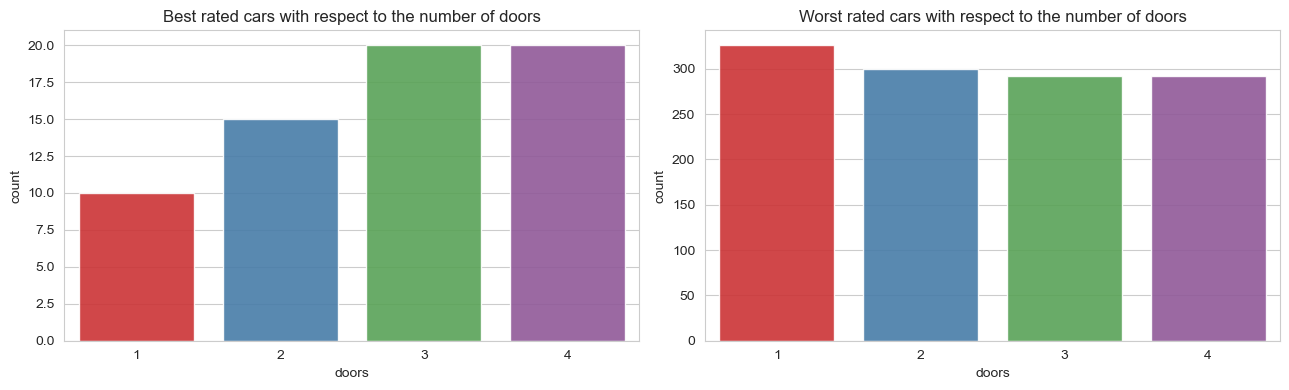

In [52]:
# What are the worst and best cars based on the number of doors?
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4))

axes[0].set_title('Best rated cars with respect to the number of doors')
sns.countplot(ax=axes[0], data=highest, x='doors', palette='Set1', alpha=0.9)

axes[1].set_title('Worst rated cars with respect to the number of doors')
sns.countplot(ax=axes[1], data=lowest, x='doors', palette='Set1', alpha=0.9)

plt.tight_layout()

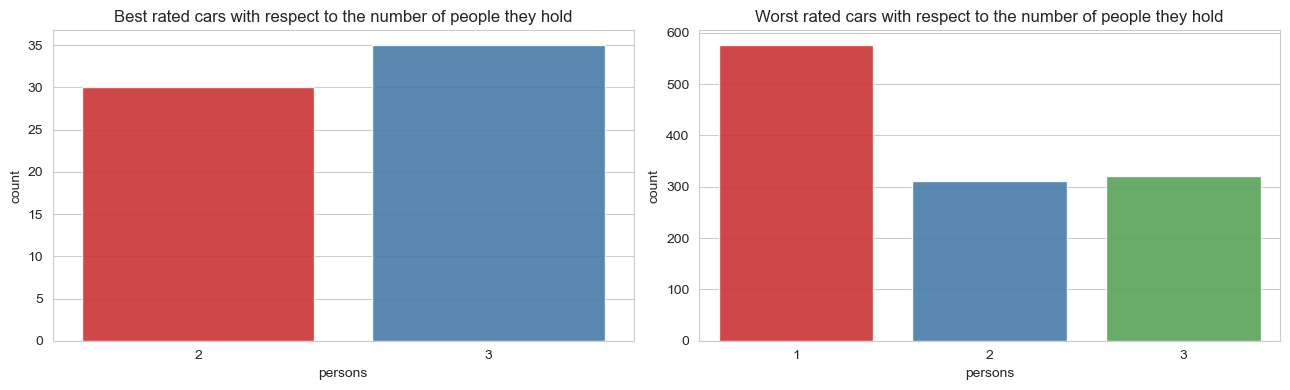

In [53]:
# What are the worst and best cars based on the number of people they hold?
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4))

axes[0].set_title('Best rated cars with respect to the number of people they hold')
sns.countplot(ax=axes[0], data=highest, x='persons', palette='Set1', alpha=0.9)

axes[1].set_title('Worst rated cars with respect to the number of people they hold')
sns.countplot(ax=axes[1], data=lowest, x='persons', palette='Set1', alpha=0.9)

plt.tight_layout()

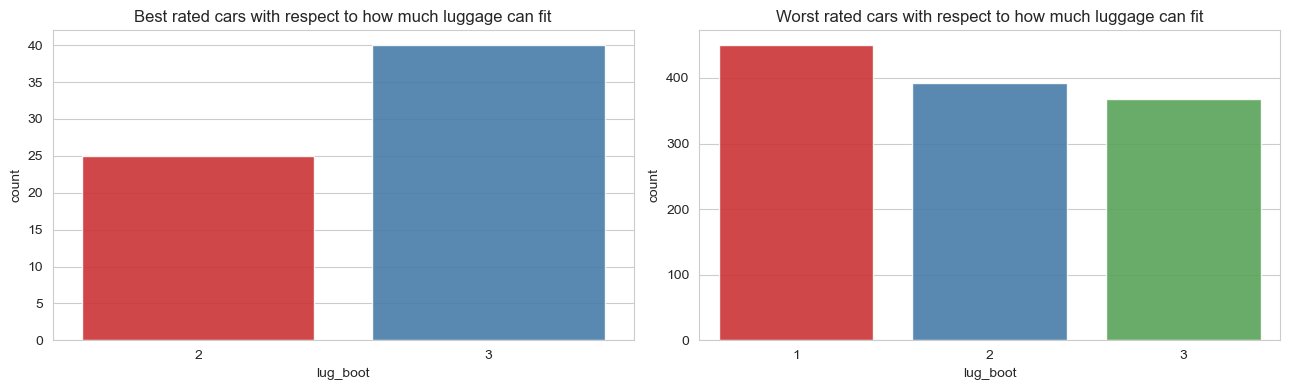

In [54]:
# What are the worst and best cars based on how much luggage can fit?
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4))

axes[0].set_title('Best rated cars with respect to how much luggage can fit')
sns.countplot(ax=axes[0], data=highest, x='lug_boot', palette='Set1', alpha=0.9)

axes[1].set_title('Worst rated cars with respect to how much luggage can fit')
sns.countplot(ax=axes[1], data=lowest, x='lug_boot', palette='Set1', alpha=0.9)

plt.tight_layout()

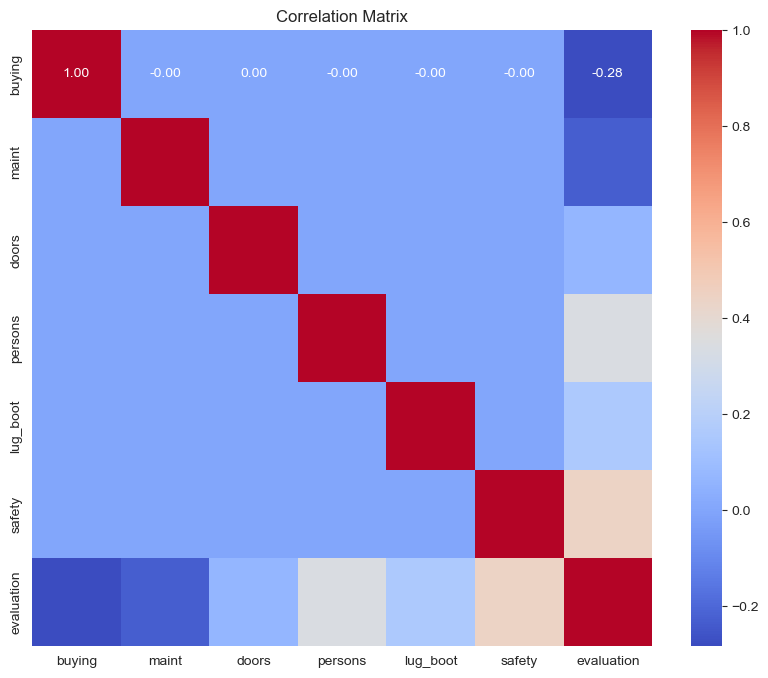

In [55]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [56]:
x = df_encoded.drop(['evaluation'], axis=1)
y = df_encoded['evaluation']

s = SMOTE(k_neighbors=2)
x, y = s.fit_resample(x, y)

print(f'Total of labels: {len(y)}')
print(Counter(y))

Total of labels: 4840
Counter({1: 1210, 2: 1210, 4: 1210, 3: 1210})


In [57]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.33, random_state=101)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x: (4840, 6)
Shape of y: (4840,)
Shape of x_train: (3242, 6)
Shape of x_test: (1598, 6)
Shape of y_train: (3242,)
Shape of y_test: (1598,)


In [32]:
# Initialize and train the Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)

# Obtener los hiperparámetros del modelo
params = rf_classifier.get_params()

# Mostrar los hiperparámetros y sus valores actuales
for param, value in params.items():
    print(f'{param}: {value}')

bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


In [58]:
model = RandomForestClassifier(n_estimators=100, random_state=101)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=101)

In [59]:
model.predict(x_test)

array([1, 1, 3, ..., 2, 1, 2], dtype=int64)

In [61]:
model.predict([[3,2,1,2,1,3]])

array([2], dtype=int64)

In [33]:
# Gridserch criteria
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_features': ['sqrt', 'log2'],
              'n_estimators': [100, 1000, 10000], 
              }

start = time.time()

# Gridsearch
grid = GSCV(rf_classifier, param_grid, refit=True, verbose=3)

grid.fit(x_train, y_train)

end = time.time()
elapsed_time = end - start

print('\n')
print(f"Grid search elapsed time: {elapsed_time} seconds")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.991 total time=   0.1s
[CV 2/5] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.995 total time=   0.1s
[CV 3/5] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.995 total time=   0.1s
[CV 4/5] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.991 total time=   0.1s
[CV 5/5] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.991 total time=   0.1s
[CV 1/5] END criterion=gini, max_features=sqrt, n_estimators=1000;, score=0.991 total time=   1.8s
[CV 2/5] END criterion=gini, max_features=sqrt, n_estimators=1000;, score=0.995 total time=   1.7s
[CV 3/5] END criterion=gini, max_features=sqrt, n_estimators=1000;, score=0.994 total time=   1.7s
[CV 4/5] END criterion=gini, max_features=sqrt, n_estimators=1000;, score=0.989 total time=   1.7s
[CV 5/5] END criterion=gini, max_features=sqrt, n_est

In [34]:
print('Random Forest Model')
print('Best param in "criterion": ', grid.best_params_['criterion'])
print('Best param in "max_features": ', grid.best_params_['max_features'])
print('Best param in "n_estimators": ', grid.best_params_['n_estimators'], '\n')

Random Forest Model
Best param in "criterion":  gini
Best param in "max_features":  sqrt
Best param in "n_estimators":  100 



In [62]:
predictions = model.predict(x_test)

print(Counter(predictions))

Counter({1: 407, 2: 402, 4: 401, 3: 388})


[Text(0.5, 1.0, 'Number of cars per evaluation')]

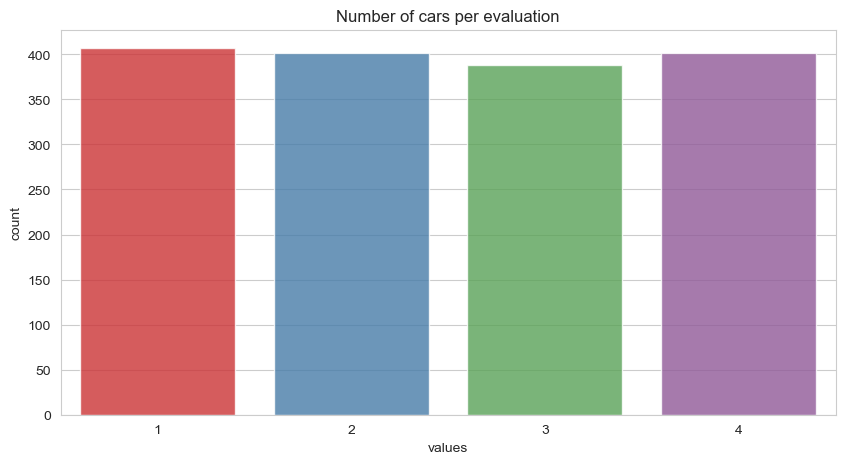

In [63]:
# Convertir el array de NumPy a un DataFrame de pandas
df_pred = pd.DataFrame(predictions, columns=['values'])

# Crear el count plot usando seaborn
plt.figure(figsize=(10,5))
sns.countplot(data=df_pred, x='values', palette='Set1', alpha=0.8).set(title = 'Number of cars per evaluation')

In [64]:
print(cr(y_test, predictions))


              precision    recall  f1-score   support

           1       1.00      0.97      0.99       419
           2       0.97      1.00      0.99       391
           3       1.00      1.00      1.00       387
           4       1.00      1.00      1.00       401

    accuracy                           0.99      1598
   macro avg       0.99      0.99      0.99      1598
weighted avg       0.99      0.99      0.99      1598



Model Accuracy: 99.25%


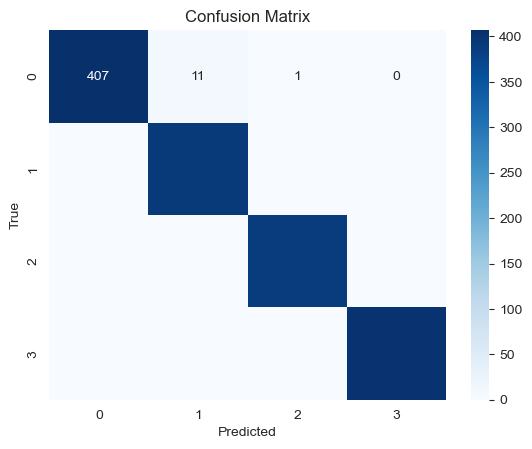

In [65]:
print(f'Model Accuracy: {round(accuracy_score(y_test , predictions)*100, 2)}%')

# Visualize the confusion matrix with seaborn
sns.heatmap(cm(y_test, predictions), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [73]:
[x_test.iloc[21].values]

[array([1, 1, 2, 3, 1, 3], dtype=int64)]

In [74]:
y_test.iloc[21]

3

In [29]:
grid.predict([x_test.iloc[0].values])

NameError: name 'grid' is not defined

In [30]:
y_test[0]

1

In [31]:
# Save the model and the scaler
import pickle
with open('ML_classification.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [32]:
x_test

,buying,maint,doors,persons,lug_boot,safety
214,4,3,4,3,3,2
153,4,3,2,3,1,1
2574,1,1,1,2,3,2
647,3,3,4,3,3,3
4324,1,2,2,3,2,3
...,...,...,...,...,...,...
1321,1,4,1,3,3,2
1972,4,2,1,3,3,2
1469,1,3,3,2,1,3
55,4,4,3,1,1,2


In [33]:
import pickle
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Load the model
with open('ML_classification.pkl', 'rb') as f:
    model = pickle.load(f)

# Define the initial types for the model inputs
initial_type = [('float_input', FloatTensorType([None, 6]))]  # 7 features

# Convert to ONNX format
onnx_model = convert_sklearn(model, initial_types=initial_type)

# Save to a file
with open('ML_classification.onnx', 'wb') as f:
    f.write(onnx_model.SerializeToString())


In [ ]:
aarch64-linux-gnu-g++ -o classification classification_rf.cpp -I/home/phani/onnxruntime-linux-aarch64-1.18.0/include -L/home/phani/onnxruntime-linux-aarch64-1.18.0/lib -lonnxruntime


In [ ]:
scp -P 2222 -r /mnt/c/Users/A507658/Downloads/qwen2-docker/ML_classification.onnx root@localhost:/root/

In [56]:
y_test

214     1
153     1
2574    3
647     2
4324    4
       ..
1321    2
1972    2
1469    2
55      1
1930    2
Name: evaluation, Length: 1598, dtype: int64

In [63]:
import onnxruntime as ort
import numpy as np

session = ort.InferenceSession("ML_classification.onnx")
inputs = {session.get_inputs()[0].name: np.array([[4, 4, 2, 1, 2, 1]], dtype=np.float32)}
outputs = session.run(None, inputs)
print(outputs)


[array([1], dtype=int64), [{1: 0.9999999403953552, 2: 0.0, 3: 0.0, 4: 0.0}]]


In [68]:
import onnx

# Load the ONNX model
model = onnx.load("ML_classification.onnx")

# Print input names
print("Input names:")
for input in model.graph.input:
    print(input.name)

# Print output names
print("Output names:")
for output in model.graph.output:
    print(output.name)

Input names:
float_input
Output names:
output_label
output_probability


In [78]:
import onnxruntime as ort

# Load the ONNX model
session = ort.InferenceSession("ML_classification.onnx")

# Get the input names
input_names = [input.name for input in session.get_inputs()]
print("Input Names:", input_names)

# Get the output names
output_names = [output.name for output in session.get_outputs()]
print("Output Names:", output_names)


Input Names: ['float_input']
Output Names: ['output_label', 'output_probability']


In [79]:
import onnxruntime as ort
session = ort.InferenceSession("ML_classification.onnx")
inputs = {session.get_inputs()[0].name: np.array([[3,2,1,2,1,3]], dtype=np.float32)}
outputs = session.run(None, inputs)
print(outputs)


[array([2], dtype=int64), [{1: 0.009999999776482582, 2: 0.9899999499320984, 3: 0.0, 4: 0.0}]]


In [34]:
import onnxruntime as ort
import numpy as np

# Load the ONNX model
session = ort.InferenceSession("ML_classification.onnx")

# Get the input names
input_names = [input.name for input in session.get_inputs()]
print("Input Names:", input_names)

# Get the output names
output_names = [output.name for output in session.get_outputs()]
print("Output Names:", output_names)

# Prepare the input data (make sure it's the correct shape and dtype)
inputs = {input_names[0]: np.array([[3, 2, 1, 2, 1, 3]], dtype=np.float32)}  # Example input

# Run the model to get predictions
outputs = session.run(output_names, inputs)

# Extract the outputs (label and probability)
output_label = outputs[0]  # First output is likely the predicted class
output_probability = outputs[1]  # Second output is likely the class probabilities

# Print the results
print("Predicted Label:", output_label)
print("Class Probabilities:", output_probability)


Input Names: ['float_input']
Output Names: ['output_label', 'output_probability']
Predicted Label: [2]
Class Probabilities: [{1: 0.0, 2: 0.9999999403953552, 3: 0.0, 4: 0.0}]


In [65]:
x_test

,buying,maint,doors,persons,lug_boot,safety
214,4,3,4,3,3,2
153,4,3,2,3,1,1
2574,1,2,1,2,3,2
647,3,3,4,3,3,3
4324,2,1,3,3,3,3
...,...,...,...,...,...,...
1321,1,4,1,3,3,2
1972,2,4,4,2,2,2
1469,1,3,3,2,1,3
55,4,4,3,1,1,2


In [66]:
for i in x_test.columns:
    print(x_test[i].value_counts())

buying
1    710
2    482
3    208
4    198
Name: count, dtype: int64
maint
1    642
2    488
3    263
4    205
Name: count, dtype: int64
doors
2    430
1    401
4    400
3    367
Name: count, dtype: int64
persons
2    828
3    572
1    198
Name: count, dtype: int64
lug_boot
3    588
2    584
1    426
Name: count, dtype: int64
safety
3    881
2    516
1    201
Name: count, dtype: int64


In [67]:
x_test['lug_boot'].value_counts()

lug_boot
3    588
2    584
1    426
Name: count, dtype: int64

In [35]:
import onnx

model = onnx.load("ML_classification.onnx")
for input in model.graph.input:
    print(input.name)


float_input


In [36]:
import onnxruntime as ort

session = ort.InferenceSession("ML_classification.onnx")
for output in session.get_outputs():
    print("Output name:", output.name)


Output name: output_label
Output name: output_probability


In [70]:
import onnx

# Load the model
model = onnx.load("ML_classification.onnx")

# Print input names
for input in model.graph.input:
    print(f"Input Name: {input.name}")

# Print output names
for output in model.graph.output:
    print(f"Output Name: {output.name}")


Input Name: float_input
Output Name: output_label
Output Name: output_probability


In [72]:
import onnx

# Load the model
model = onnx.load("ML_classification.onnx")

# Print input information
for input in model.graph.input:
    print(f"Input Name: {input.name}")
    print(f"Input Shape: {input.type.tensor_type.shape}")

for input in model.graph.output:
    print(f"Input Name: {input.name}")
    print(f"Input Shape: {input.type.tensor_type.shape}")


Input Name: float_input
Input Shape: dim {
}
dim {
  dim_value: 6
}

Input Name: output_label
Input Shape: dim {
}

Input Name: output_probability
Input Shape: 
